In [1]:
import json
import pandas as pd
import chardet
import re
from nltk.corpus import stopwords
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Leer los primeros bytes del archivo para detectar la codificación
with open('traficogt.txt', 'rb') as file:
    raw_data = file.read()

# Detectar la codificación
result = chardet.detect(raw_data)
encoding = result['encoding']

# Lista para almacenar todos los objetos JSON
data_list = []

# Leer el archivo línea por línea
with open('traficogt.txt', 'r', encoding=encoding) as file:
    for line in file:
        try:
            # Intentar convertir cada línea en un objeto JSON
            json_data = json.loads(line)
            data_list.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error en la línea: {line}, error: {e}")

# Crear un DataFrame con todos los objetos JSON
df = pd.json_normalize(data_list)

# Mostrar el DataFrame
df


Error en la línea: {"id": 1711127305131631071, "id_str": "1711127305131631071", "url": "https://x.com/nquevedoa/status/1711127305131631071", "date": "2023-10-08 21:11:55+00:00", "user": {"id": 204996481, "id_str": "204996481", "url": "https://x.com/nquevedoa", "username": "nquevedoa", "displayname": "Nelque", "rawDescription": "", "created": "2010-10-19 23:02:23+00:00", "followersCount": 218, "friendsCount": 111, "statusesCount": 228617, "favouritesCount": 199488, "listedCount": 2, "mediaCount": 530, "location": "Guatemala", "profileImageUrl": "https://pbs.twimg.com/profile_images/1013567326216687617/f7kWGWnp_normal.jpg", "profileBannerUrl": "https://pbs.twimg.com/profile_banners/204996481/1530488114", "protected": null, "verified": false, "blue": false, "blueType": null, "descriptionLinks": [], "pinnedIds": [], "_type": "snscrape.modules.twitter.User"}, "lang": "es", "rawContent": "@mildred_gaitan @jczamora @traficogt @ChepeZamora @el_Periodico @mmendoza_GT @cmendeza @JLFont001 @Marie

id               id_str  \
0     1834236045598056867  1834236045598056867   
1     1834029142565658846  1834029142565658846   
2     1834039491826180424  1834039491826180424   
3     1833963729136091179  1833963729136091179   
4     1833665391698092330  1833665391698092330   
...                   ...                  ...   
5599  1711138940990722120  1711138940990722120   
5600  1711133805182869820  1711133805182869820   
5601  1711133697552810362  1711133697552810362   
5602  1711132207631212797  1711132207631212797   
5603  1711127715741417476  1711127715741417476   

                                                    url  \
0     https://x.com/traficogt/status/183423604559805...   
1     https://x.com/monymmorales/status/183402914256...   
2     https://x.com/animaldgalaccia/status/183403949...   
3     https://x.com/EstacionDobleA/status/1833963729...   
4     https://x.com/CubReserva/status/18336653916980...   
...                                                 ...   
5599  https://x.com/guiselabarrios/status/1711138940...   
5600  https://x.com/mvtrooper/status/171113380518286...   
5601  https://x.com/elmeronene1/status/1711133697552...   
5602  https://x.com/mvtrooper/status/171113220763121...   
5603  https://x.com/91072dff5a5a4f1/status/171112771...   

                           date lang  \
0     2024-09-12 14:22:06+00:00   es   
1     2024-09-12 00:39:56+00:00   es   
2     2024-09-12 01:21:04+00:00  qme   
3     2024-09-11 20:20:01+00:00  qam   
4     2024-09-11 00:34:31+00:00   es   
...                         ...  ...   
5599  2023-10-08 21:58:09+00:00   es   
5600  2023-10-08 21:37:45+00:00   es   
5601  2023-10-08 21:37:19+00:00   es   
5602  2023-10-08 21:31:24+00:00  qme   
5603  2023-10-08 21:13:33+00:00   es   

                                             rawContent  replyCount  \
0     Es comprensible la resolución... El ruso sabe ...           0   
1     La corrupción de la @CC_Guatemala\nes descarad...           0   
2     @PNCdeGuatemala @mingobguate @FJimenezmingob @...           0   
3     @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...           0   
4     @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...           0   
...                                                 ...         ...   
5599  @traficogt Y no que presentando 5 mil firmas a...           0   
5600  @hshetemul @traficogt Y de igual Manera quitan...           0   
5601  @traficogt Es algo más fuerte que ellos no qui...           0   
5602  @Factor4_GT @traficogt @CC_Guatemala @MPguatem...           0   
5603           @AgenciaOcote @traficogt Vieja ignorante           0   

      retweetCount  likeCount  quoteCount  ...  \
0                0          1           0  ...   
1               56         84           4  ...   
2                0          1           0  ...   
3                0          0           0  ...   
4                0          1           0  ...   
...            ...        ...         ...  ...   
5599             0          0           0  ...   
5600             0          0           0  ...   
5601             0          0           0  ...   
5602             0          0           0  ...   
5603             0          0           0  ...   

      quotedTweet.quotedTweet.inReplyToTweetIdStr  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
5599                                          NaN   
5600                                          NaN   
5601                                          NaN   
5602                                          NaN   
5603                                          NaN   

      quotedTweet.quotedTweet.inReplyToUser quotedTweet.quotedTweet.source  \
0                                       NaN                    

# 3 Preprocesamiento de Datos

In [4]:
stop_words = set(stopwords.words('spanish'))

In [5]:
# Expresiones regulares compiladas para mejorar el rendimiento
mention_pattern = re.compile(r'@\w+')
url_pattern = re.compile(r'http\S+')
punctuation_pattern = re.compile(r'[^\w\s]')
digit_pattern = re.compile(r'\d+')


# Función para limpiar el texto de un tweet
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = mention_pattern.sub('', text)  # Eliminar menciones (@usuario)
    text = url_pattern.sub('', text)  # Eliminar URLs
    text = punctuation_pattern.sub('', text)  # Eliminar puntuación
    text = digit_pattern.sub('', text)  # Eliminar números
    
    # Filtrar palabras que no estén en la lista de stop_words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Función para verificar si una línea es un JSON válido
def validar_json(line):
    try:
        json.loads(line)
        return True
    except json.JSONDecodeError:
        return False

def normalizacion_usuario(username):
    return username.lower().replace('@', '').strip()

def metadata(tweet):
    mentions = [normalizacion_usuario(mention['username']) for mention in tweet.get('mentionedUsers', [])]
    
    in_reply_to = tweet.get('inReplyToUser', {})
    in_reply_to_username = in_reply_to.get('username', None) if in_reply_to else None
    
    retweeted_tweet = tweet.get('retweetedTweet', {})
    retweeted_user = retweeted_tweet.get('user', {}).get('username', None) if retweeted_tweet else None
    
    return mentions, normalizacion_usuario(in_reply_to_username) if in_reply_to_username else None, normalize_username(retweeted_user) if retweeted_user else None


# Función para cargar y limpiar el archivo de tweets
def clean_file(file_path):
    tweets_data = []
    with open(file_path, 'r', encoding='utf-16') as file:
        for line_number, line in enumerate(file, 1):
            try:
                tweet = json.loads(line) 
                raw_content = tweet.get('rawContent', '') 
                mentions, in_reply_to, retweeted_user = metadata(tweet)
                if raw_content:
                    cleaned_text = clean_text(raw_content)  
                    tweets_data.append({
                        'rawContent': raw_content,
                        'cleaned_text': cleaned_text,
                        'mentions': mentions,
                        'in_reply_to': in_reply_to,
                        'retweeted_user': retweeted_user
                    })
            except json.JSONDecodeError as e:
                print(f"Error decodificando JSON en la línea {line_number}: {e}")
    return pd.DataFrame(tweets_data)

tioberny_df = clean_file('traficogt.txt')

print("\nEjemplos de tweets limpiados de tioberny:")
print(tioberny_df.head())


Error decodificando JSON en la línea 5605: Expecting ',' delimiter: line 1 column 4314 (char 4313)

Ejemplos de tweets limpiados de tioberny:
                                          rawContent  \
0  Es comprensible la resolución... El ruso sabe ...   
1  La corrupción de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                        cleaned_text  \
0  comprensible resolución ruso sabe engrasar maq...   
1  corrupción descarada falsificación documentos ...   
2                                                      
3                                                      
4  urgente zona deterioro tala inmoderada tráfico...   

                                            mentions     in_reply_to  \
0                                                 []            None   
1                                     [c

#### Eliminar duplicados

# 4 Analisis Explotartorio

#### Número de tweets, usuarios únicos, menciones

In [6]:
total_tweets = len(df)
unique_users = df['user.id'].nunique()

print(f"Total de tweets: {total_tweets}")
print(f"Usuarios únicos: {unique_users}")


Total de tweets: 5604
Usuarios únicos: 2071


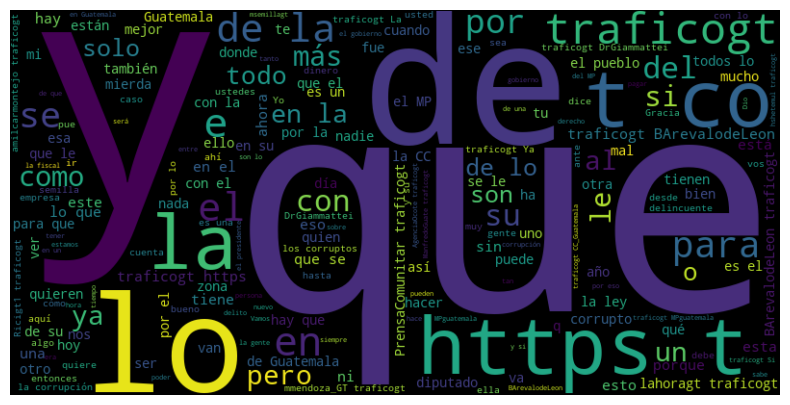

In [7]:


text = ' '.join(df['rawContent'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 5 Análisis de la Topología de la Red

C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python\P

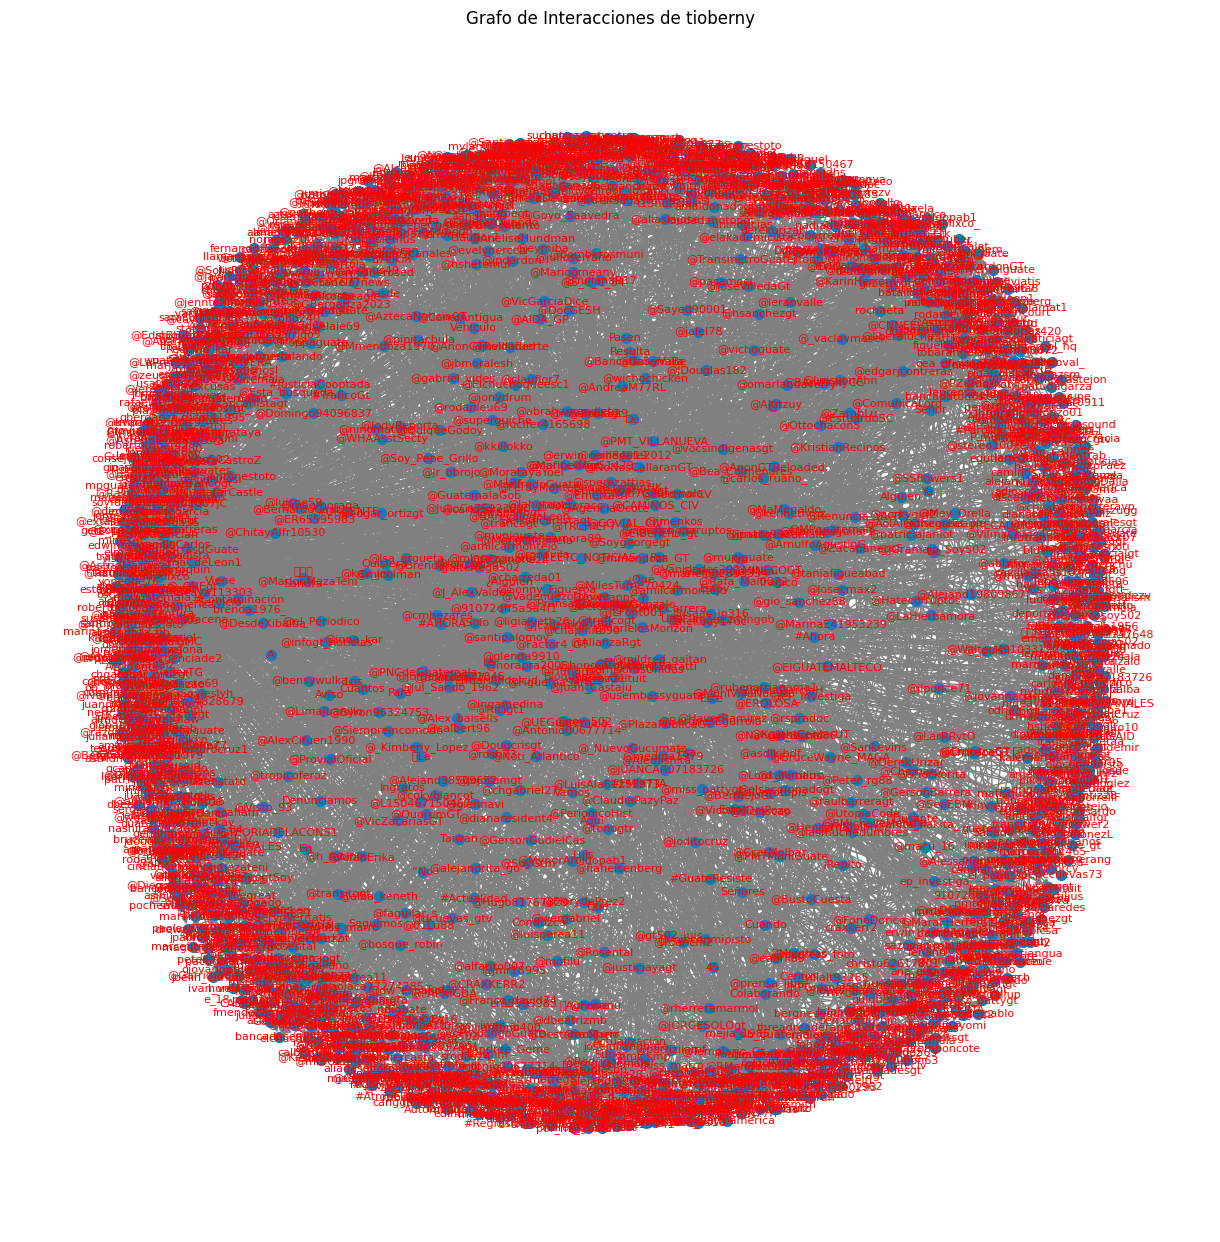

Densidad de la red: 0.0009518782678522288
La red no es conexa, no se puede calcular el diámetro.
Coeficiente de agrupamiento promedio: 0.0


In [8]:
# Importar las métricas necesarias
from networkx import density, diameter, clustering, is_connected

# Función para construir el grafo a partir de los DataFrames procesados
def grafo_interacciones(df):
    G = nx.DiGraph()  # Crear un grafo dirigido
    
    for _, row in df.iterrows():
        user = row['rawContent'].split(' ')[0] 
        
        # Añadir aristas para menciones
        for mention in row['mentions']:
            if mention and user:
                G.add_edge(user, mention, interaction='mention')
        
        # Añadir aristas para respuestas
        if row['in_reply_to']:
            G.add_edge(user, row['in_reply_to'], interaction='reply')
        
        # Añadir aristas para retweets
        if row['retweeted_user']:
            G.add_edge(user, row['retweeted_user'], interaction='retweet')
    
    return G

# Construir el grafo
tioberny = grafo_interacciones(tioberny_df)

# Visualizar el grafo de tioberny
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tioberny, k=0.5, iterations=50)
nx.draw(tioberny, pos, with_labels=True, node_size=50, font_size=8, font_color='red', edge_color='gray')
plt.title("Grafo de Interacciones de tioberny")
plt.show()

# 5.2 Cálculo de métricas clave

# Densidad de la red
network_density = density(tioberny)
print(f"Densidad de la red: {network_density}")

# Diámetro de la red
# El diámetro solo puede calcularse en grafos conexos, primero verificamos si la red es conexa
if nx.is_connected(tioberny.to_undirected()):
    network_diameter = diameter(tioberny)
    print(f"Diámetro de la red: {network_diameter}")
else:
    print("La red no es conexa, no se puede calcular el diámetro.")

# Coeficiente de agrupamiento
clustering_coefficients = clustering(tioberny)
avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print(f"Coeficiente de agrupamiento promedio: {avg_clustering_coefficient}")


# 6. Identificación y análisis de comunidades

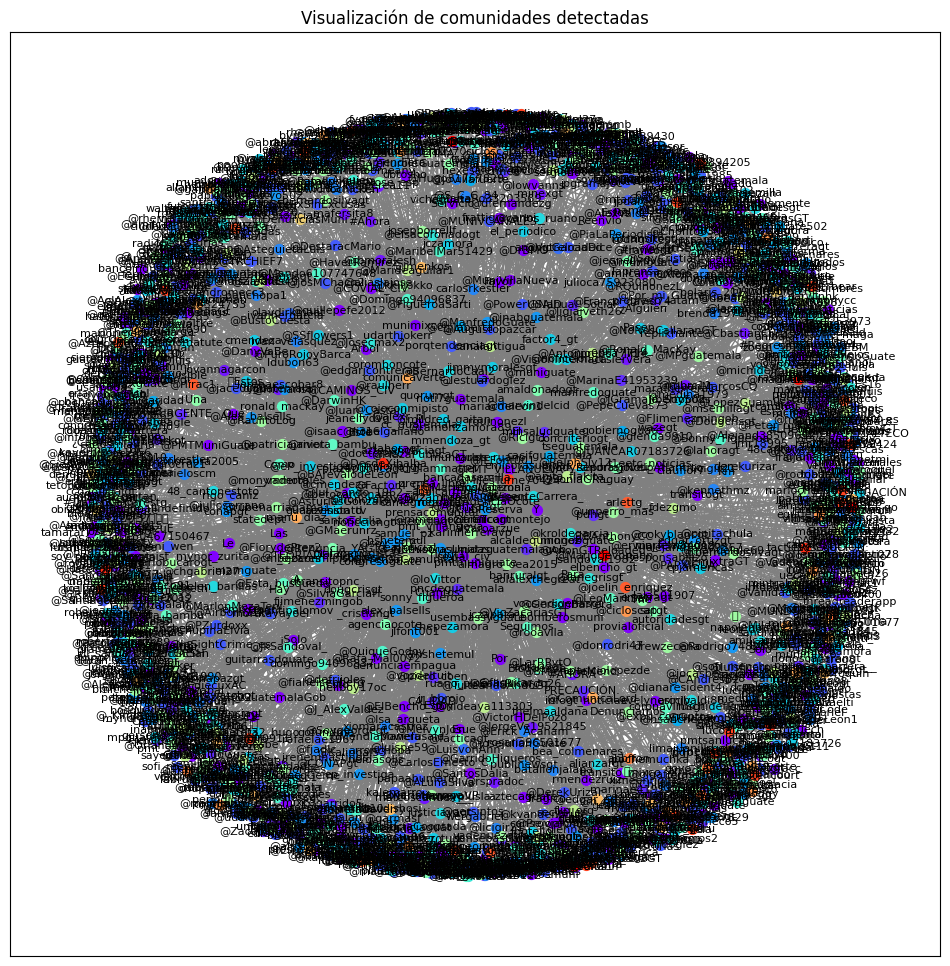

In [9]:
import community as community_louvain
import numpy as np

# Convertir el grafo dirigido a uno no dirigido
tioberny_undirected = tioberny.to_undirected()

# Aplicar el algoritmo de Louvain para detectar comunidades en el grafo no dirigido
partition = community_louvain.best_partition(tioberny_undirected)

# Añadir la comunidad detectada como atributo de los nodos en el grafo
nx.set_node_attributes(tioberny, partition, 'community')

# Visualizar la partición o comunidades detectadas
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(tioberny_undirected, k=0.5)

# Colores únicos para cada comunidad
communities = set(partition.values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

for community, color in zip(communities, colors):
    nodes_in_community = [node for node in partition if partition[node] == community]
    nx.draw_networkx_nodes(tioberny_undirected, pos, nodelist=nodes_in_community, node_size=50, node_color=[color])

nx.draw_networkx_edges(tioberny_undirected, pos, edge_color='gray')
nx.draw_networkx_labels(tioberny_undirected, pos, font_size=8, font_color='black')
plt.title("Visualización de comunidades detectadas")
plt.show()


In [10]:
from collections import Counter

# Contar el número de nodos en cada comunidad
community_sizes = Counter(partition.values())
top_communities = community_sizes.most_common(3)

for i, (community, size) in enumerate(top_communities, 1):
    print(f"Comunidad {i}: {size} nodos")

Comunidad 1: 425 nodos
Comunidad 2: 293 nodos
Comunidad 3: 153 nodos


# 7. Análisis de influencers y nodos clave

In [11]:
# Centralidad de grado
degree_centrality = nx.degree_centrality(tioberny)

# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(tioberny)

# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(tioberny)

# Mostrar los 5 nodos más influyentes por cada métrica
print("Top 5 por Centralidad de Grado:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 por Centralidad de Intermediación:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nTop 5 por Centralidad de Cercanía:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 por Centralidad de Grado:
[('traficogt', 0.3830746119178768), ('@traficogt', 0.060590886329494234), ('barevalodeleon', 0.05908863294942413), ('mpguatemala', 0.0400600901352028), ('drgiammattei', 0.0385578367551327)]

Top 5 por Centralidad de Intermediación:
[('La', 0.0), ('cc_guatemala', 0.0), ('@PNCdeGuatemala', 0.0), ('pncdeguatemala', 0.0), ('mingobguate', 0.0)]

Top 5 por Centralidad de Cercanía:
[('traficogt', 0.38307461191787684), ('barevalodeleon', 0.05908863294942414), ('mpguatemala', 0.04006009013520281), ('drgiammattei', 0.0385578367551327), ('amilcarmontejo', 0.037055583375062595)]


# 8. Detección y análisis de grupos aislados

In [12]:
# Encontrar componentes conectados en la versión no dirigida del grafo
subredes_aisladas = list(nx.connected_components(tioberny.to_undirected()))

# Mostrar las subredes más pequeñas
print(f"Subredes aisladas: {len(subredes_aisladas)}")
for subred in subredes_aisladas[:5]:
    print(f"Subred con {len(subred)} nodos: {subred}")


Subredes aisladas: 8
Subred con 1984 nodos: {'pikaso_me', '@Por_mi_Guate', '@SoniaGRaguay', '@msemillagt', 'doctoracc', 'cesargarcia0293', '@ASIERVERA', '@AnonGTReloaded', 'vicentecarrera_', 'minsaludguate', '“No', '@GuillenGabs', '@Theclowbala', 'statedep', 'Primer', 'nelton_rivera', '@JPabloCast', 'trchief7', 'asinibaldi88', 'jovillafuerte', 'josepborrellf', 'asiervera', 'leonkrauze', '#ePInvestiga', 'Sábado', 'ciengt', 'andreakomio', '@GuitarrasdGuate', '@raulherr', 'powerusaid', '@KnightCenterUT', 'guatemalasalud1', 'hernandezmack', 'limajuanillo', 'plazapublicagt', '_chapinguate502', '@E_18_M_12_4', 'pressfreedom', 'Ministra', '@MiguelitogtSoy', '@nideaya113303', 'guerrerogarnica', 'teddyallen', '@cokyblancot', 'piero_coen', 'kongatot', 'aliaslajose', '🚨🚨🚨🚨ATENCIÓN🚨🚨🚨🚨\nSon', 'Lamentablemente', '@ChupinaElvia', 'taniafigueabad', 'erolosa', 'nimajpu', 'melvynjosue', '@Soyleslyh', 'zuryxguate', 'infogt_noticias', '@elmar_iguano', 'bacteriasound', 'casadedios', '@CermenoItalo', '@Soy

# 9. Análisis de contenido y sentimiento

In [13]:
from textblob import TextBlob

# Añadir análisis de sentimiento a cada tweet
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    return analysis.sentiment.polarity

# Aplicar a los tweets
tioberny_df['sentimiento'] = tioberny_df['cleaned_text'].apply(obtener_sentimiento)

# Mostrar algunos ejemplos
print(tioberny_df[['rawContent', 'sentimiento']].head())


                                          rawContent  sentimiento
0  Es comprensible la resolución... El ruso sabe ...          0.0
1  La corrupción de la @CC_Guatemala\nes descarad...          0.0
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...          0.0
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...          0.0
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...          0.0


In [14]:
import nltk
from gensim import corpora
from gensim.models import LdaModel
nltk.download('punkt', force=True)

import spacy
nlp = spacy.load('en_core_web_sm')

# Tokenizar usando Spacy
tokenized_texts = [[token.text for token in nlp(tweet)] for tweet in tioberny_df['cleaned_text']]

dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Mostrar los temas más importantes
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arg21\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


(0, '0.013*"si" + 0.007*"ser" + 0.005*"gobierno" + 0.005*"así" + 0.004*"mierda"')
(1, '0.005*"mp" + 0.005*"si" + 0.005*"solo" + 0.004*"congreso" + 0.004*"va"')
(2, '0.008*"solo" + 0.006*"guatemala" + 0.005*"si" + 0.004*"puede" + 0.004*"pueblo"')
(3, '0.010*"guatemala" + 0.007*"pueblo" + 0.006*"corruptos" + 0.006*"gracias" + 0.005*"democracia"')
(4, '0.019*"si" + 0.006*"solo" + 0.006*"bloqueos" + 0.006*"q" + 0.005*"pueblo"')
